## 출력층 설계하기 

신경망은 분류와 회귀 모두에 이용할 수 있다. 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
* 회귀 : 항등함수
* 분류 : 소프트맥스

### 항등함수와 소프트맥스 함수 구현 

#### 함등함수
입력을 그대로 출력   
입력과 출력이 항상 같다는 뜻의 항등이다. 출력층에서 항등함수를 사용하면 입력 신호가 그래도 출력신호가 된다. 

<img src="https://blog.kakaocdn.net/dn/MZmKQ/btqLLGiiLC4/6FKq0YmyQirfHDiZbqbS20/img.png" width="200" height="150"/>  


#### 소프트 맥스 함수 

**Equation : Softmax function**

$
\ {y}_k = \dfrac{\exp(ak)}{\sum\limits_{i=1}^{n}{\exp(ai)}}
$

n은 출력층의 뉴련수, $yk$는 그 중 k번째 출력임을 뜻한다.   
소프트맥스 함수의 분자는 입력신호 $ak$의 지수함수, 분모는 모든 입력 신호의 지수함수의 합으로 구성. 




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
a = np.array([0.3,2.9, 4.0])

exp_a = np.exp(a) # 지수함수

sum_exp_a = np.sum(exp_a) # 지수함수의 합

y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [3]:
def soft_max(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    a = np.array([0.3,2.9, 4.0])
    y = exp_a / sum_exp_a
    
    return y

#### 소프트맥스 함수 구현시 주의점 

오퍼플로 문제 : 컴퓨터는 4바이트나 8바이트와 같이 크기가 유한한 데이터를 다룬다. 표현할 수 있는 범위가 한정되어 너무 큰값은 표현할 수 없다느 문제 발생 
소프트맥스 함수는 지수함수를 사용하기 때문에 큰 값을 출력한다. 큰 출력값에 나눗셈을 적용하면 결과 수치가 불안정 해짐. 

<img src="https://t1.daumcdn.net/cfile/tistory/99EFEB335D8C14752F" width="300" height="250"/> 
개선한 수식 

첫번째 변형에서는 C라는 임의의 정수를 분자와 분모 양쪽에 곱한다. 다음으로 C를 지수함수 exp()안으로 옮겨 logC로 만든다. 마지막으로 logC를 C'라는 새로운 기호로 바꾼다.  

소프트맥스의 지수 함수를 계산할때 어떤 정수를 더해도 결과는 바뀌지 않는다. C'에 어떤값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

In [4]:
a = np.array([1010, 1000, 990])

np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수 계산 , 계산이 안 이루어짐 

array([nan, nan, nan])

In [5]:
C = np.max(a) # 1010 최댓값

a-C

array([  0, -10, -20])

In [6]:
np.exp(a - C) / np.sum(np.exp(a - C) )  # 입력신호 중 최댓값을 빼주면 올바게 계산 

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [7]:
def soft_max(a) :
    C = np.max(a) 
    exp_a = np.exp(a - C) # 오버플로 대책 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

#### 소프트맥스 함수의 특징  
소프트맥스 함수의 출력은 0에서 1.0사이의 실수이다. 소프트맥스 함수 출력의 총합은 1이다. 출력총합이 1이 된다는 점은 중요한 성질 
#### 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있다.

In [8]:
a = np.array([0.3,2.9,4.0])

y =soft_max(a)
print(y) 

# 18% , 25% , 73% 해석 가능 

[0.01821127 0.24519181 0.73659691]


In [9]:
np.sum(y)

1.0

소프트맥스 함수를 적용해도 각 원소의 대소관계는 변하지 않는다. 지수함수 y= exp(x)가 단조증가 함수이기 때문이다.  
신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다. 

### 출력층의 뉴런 수 정하기  

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.   
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. 

### 손글씨 숫자 인식 

forward propagation 순전차 추론과정 진행  

기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다.먼저 훈련데이터를 사용해 가중치 매개변수를 설정하고,추론 단계에서는 매개변수를 사용하여 입력데이터를 분류

In [10]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

    
# normalize 는 입력이지니의 픽셀값을 0.0~0.1사이의 값으로 정규화할지 결정
# False로 설정 시 입력이미지의 픽셀이 원래 값 그대로 0~255사이의 값 유지 
# Flatten 입력이미지를 평탄하게, 즉 1차원 배열로 만들지를 결정 
# False로 설정하면 입력 이미지를 1X28X28의 3차원 배열로 True로 설정하면 784개의 원소로 이뤄진 1차원 배열 
# one_hot_label은 레이블을 원핫 인코딩 형태로 저장할지 결정 

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)


print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [11]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()



(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


### 신경망의 추론 처리 

In [12]:
from dataset.mnist import load_mnist
import numpy as np
import pickle
from PIL import Image

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


# 정규화 진행 
# 신경망의 입력 데이터에 특정 변환을 가하는 것을 전처리라고 한다. 
# 입력 이미지 데이터에 대한 적처리 작업을 정류화를 수행한 것 

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


# pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽어옴 
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()


accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1


print("Accuracy : " + str(float(accuracy_cnt)/ len(x)))

Accuracy : 0.9352


신경망의 입력층 뉴련을 784개, 출력층 뉴련을 10개로 구상한다. 입력층 뉴런이 784인 이유는 이미지 크기가 28*28= 784, 출력층 뉴런이 10인 이유는 이 문제가 0에서 9개 까지의 숫자를 구분하는 문제이기 때문이다.   

은닉층은 총 두개로 , 첫번째 은닉층은 50개의 뉴런, 두번째 은닉층은 100개의 뉴런을 배치한다. 

### 배치 처리 

In [13]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [14]:
x.shape

(10000, 784)

In [15]:
x[0].shape

(784,)

In [16]:
W1.shape

(784, 50)

In [17]:
W2.shape

(50, 100)

In [18]:
W3.shape

(100, 10)

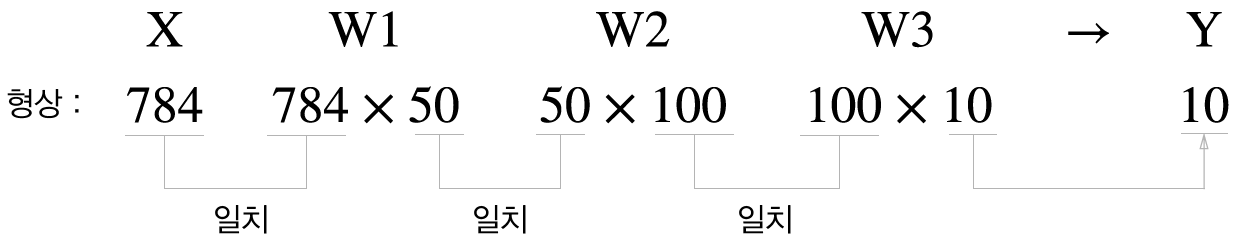

전체적으로 보면 원소 784개로 구성된 1차원 배열이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름이다. 이미지 데이터를 1장만 입력했을 때의 처리 흐름

x의 형상을 100x784 바꿔서 100장 분량의 데이터를 하나의 입력 데이터로 표현하면 될것

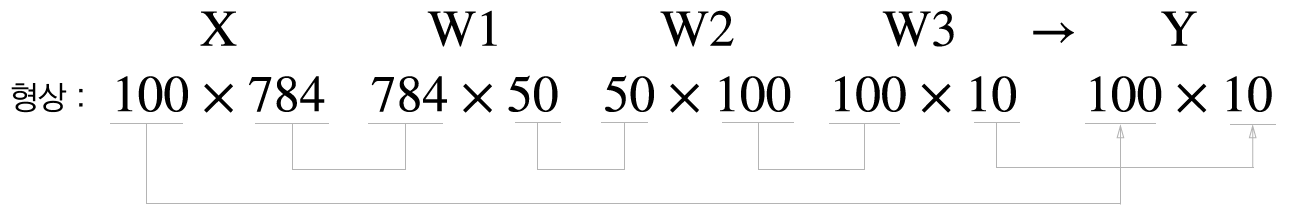

입력 데이터의 형상은 100*784, 출력 데이터의 형상은 100*10이 된다. 
100장 분량 입력 데이터의 결과가 한번에 출력됨을 나타낸다.   

가령 x[0]와 y[0]에는 0번째 이미지와 그 추론 결과가, x[1],y[1]에는 1번째의 이미지와 그 결과가 저장되는 식이다. 

**하나로 묶은 입력 데이터를 배치라고 한다.**

In [19]:
x, t = get_data()

network = init_network()

batch_size = 100 # 배치크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size) :
    x_batch = x[i : i + batch_size]
    y_batch = predict(network , x_batch)
    p = np.argmax(y_batch , axis =1)
    accuracy_cnt += np.sum(p == t[i : i +batch_size])
    
print("Accuracy : " + str(float(accuracy_cnt)/ len(x)))

Accuracy : 0.9352


range() 함수가 반환하는 반복자를 바탕으로 x[i : i + batch_size]에서 입력 데이터를 묶는다.   
x[i : i + batch_size]은 입력 데이터의 i 번째부터 i : i + batch_size번째까지의 데이터를 묶는다는 의미

argmax는 최댓값의 인덱스를 가져온다. axis = 1는 100*10의 배열 중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한 것이다. 

### 정리

* 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.  
* 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
* 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
* 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.